In [ ]:
import pandas as pd

#importing files to merge
cap_exp = pd.read_csv('/content/NTD_Capital_Expenditures (1).csv')
riders = pd.read_csv('/content/NTD_Annual_Ridership.csv')
fares = pd.read_csv('/content/Cleaned_Fare_Revenue.csv')
maj_safety = pd.read_csv('/content/NTD_Major_Safety_Incidents.csv')
nonmaj_safe = pd.read_csv('/content/NTD_NonMajor_Safety_Incidents.csv')

In [ ]:
fares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ntd_id                   3114 non-null   int64  
 1   agency_name              3114 non-null   object 
 2   reporting_module         3114 non-null   object 
 3   mode                     3114 non-null   object 
 4   expense_type             3114 non-null   object 
 5   passenger_paid_fares     3114 non-null   int64  
 6   organization_paid_fares  3114 non-null   float64
 7   total_fares              3114 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 194.8+ KB


In [ ]:
fares.head()

,ntd_id,agency_name,reporting_module,mode,expense_type,passenger_paid_fares,organization_paid_fares,total_fares
0,1,King County Department of Metro Transit,Urban,CB,Funds Earned During Period,1927211,3289701.0,5216912.0
1,1,King County Department of Metro Transit,Urban,DR,Funds Earned During Period,740726,0.0,740726.0
2,1,King County Department of Metro Transit,Urban,DR,Funds Earned During Period,91601,0.0,91601.0
3,1,King County Department of Metro Transit,Urban,FB,Funds Earned During Period,1316658,398607.0,1715265.0
4,1,King County Department of Metro Transit,Urban,LR,Funds Earned During Period,15128592,14257888.0,29386480.0


In [ ]:
#Renaming columns
cap_exp.rename(columns={"Report Year": "Year"}, inplace=True)
fares.rename(columns={"ntd_id": "NTD ID", "mode": "Mode", "total_fares": "Total Fares"}, inplace=True)


In [ ]:
bus_data_mb = bus_data[bus_data['Mode'] == 'MB']


In [ ]:
cols = ['Primary UZA Population', 'Mode VOMS', 'Total Spending', 'Total Minor Injuries',
           'Property Damage', 'Total Injuries', 'Total Fatalities', 'Total Serious Injuries']


In [ ]:
predictors = [
    'Primary UZA Population',
    'Mode VOMS',
    'Total Spending',
    'Total Minor Injuries',
    'Property Damage',
    'Total Injuries',
    'Total Fatalities',
    'Total Serious Injuries',
]

X = bus_data_mb[predictors]
y = bus_data_mb['UPT']


In [ ]:
X_reg = bus_data_mb.loc[:, cols]
if 'Total Fares' in bus_data_mb.columns:
    X_reg['Fare'] = bus_data_mb['Total Fares'] / bus_dat['UPT']

In [ ]:
X_reg['UPT'] = bus_data_mb['UPT']
X_reg['Mode'] = 'MB' #selecting bus data with mode(MB)
X_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6086 entries, 0 to 6085
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Primary UZA Population  6086 non-null   float64
 1   Mode VOMS               6086 non-null   float64
 2   Total Spending          6086 non-null   float64
 3   Total Minor Injuries    6086 non-null   float64
 4   Property Damage         6086 non-null   float64
 5   Total Injuries          6086 non-null   float64
 6   Total Fatalities        6086 non-null   float64
 7   Total Serious Injuries  6086 non-null   float64
 8   UPT                     6086 non-null   float64
 9   Mode                    6086 non-null   object 
dtypes: float64(9), object(1)
memory usage: 475.6+ KB


In [ ]:
X_reg.dropna(subset=['UPT'], inplace=True)

In [ ]:
X_reg.fillna(0, inplace=True)
X_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6086 entries, 0 to 6085
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Primary UZA Population  6086 non-null   float64
 1   Mode VOMS               6086 non-null   float64
 2   Total Spending          6086 non-null   float64
 3   Total Minor Injuries    6086 non-null   float64
 4   Property Damage         6086 non-null   float64
 5   Total Injuries          6086 non-null   float64
 6   Total Fatalities        6086 non-null   float64
 7   Total Serious Injuries  6086 non-null   float64
 8   UPT                     6086 non-null   float64
 9   Mode                    6086 non-null   object 
dtypes: float64(9), object(1)
memory usage: 475.6+ KB


Here we have 6086 entries with 10 columns that are sufficient to train the model

In [ ]:
X_reg.to_csv('bus_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#importing combined dataset with bus data
bus_data = pd.read_csv('/content/bus_data.csv')

In [ ]:
#Traning and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [ ]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)


#Plotting 1st Model Results
#1.Linear Regression Results

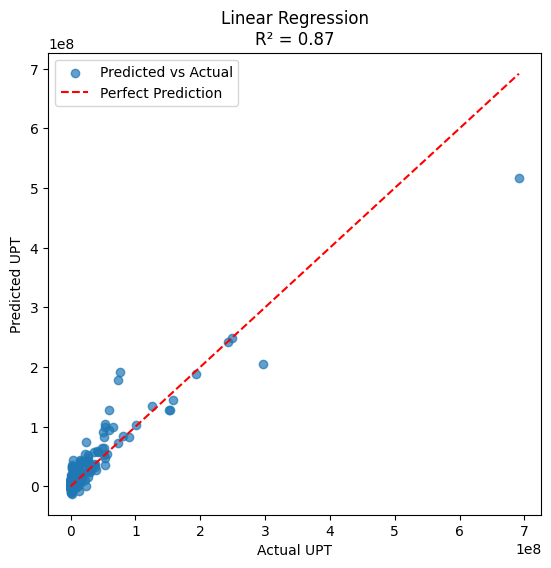

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title(f'Linear Regression\nR² = {r2_lin:.2f}')
plt.xlabel('Actual UPT')
plt.ylabel('Predicted UPT')
plt.legend()


In [ ]:
#Random Forest Regression
rf_reg = RandomForestRegressor(max_depth = 5, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)


#Plotting 2nd Model Results
##2.Random Forest Regression Results

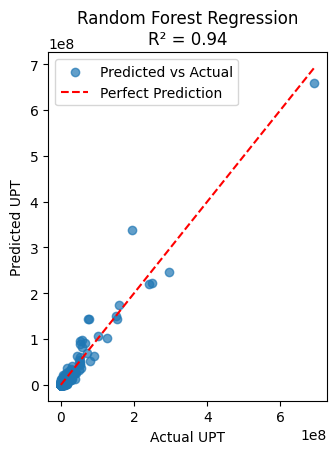

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title(f'Random Forest Regression\nR² = {r2_rf:.2f}')
plt.xlabel('Actual UPT')
plt.ylabel('Predicted UPT')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
key_feats = rf_reg.feature_importances_
feature_importance = pd.Series(key_feats, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

Mode VOMS                 0.421195
Total Minor Injuries      0.409121
Total Injuries            0.135111
Total Spending            0.019043
Property Damage           0.007934
Primary UZA Population    0.005259
Total Fatalities          0.002337
Total Serious Injuries    0.000000
dtype: float64


Key Observations:
1. Dominance of Mode VOMS:
  
  This feature alone accounts for 42% of the importance in the model's predictions, indicating its significant role in explaining UPT (Unlinked Passenger Trips).
   
   This makes sense because Mode VOMS (vehicles operated in maximum service) is directly related to operational capacity and transit ridership.

2. Role of Total Minor Injuries and Total Injuries:
  
   Together, these account for approximately 54.4% of the feature importance, suggesting a connection between safety incidents and ridership.

3. Minimal Impact of Other Features:
   
   Variables like Total Spending and Property Damage contribute less, suggesting that operational factors overshadow financial and demographic factors in predicting UPT.

In [ ]:
# Remove 'Mode VOMS' and retrain the random forest model
rf_no_voms = RandomForestRegressor(max_depth=3, random_state=1)
rf_no_voms.fit(X_train.drop(columns=['Mode VOMS']), y_train)

# Evaluate the retrained model
y_pred_no_voms = rf_no_voms.predict(X_test.drop(columns=['Mode VOMS']))
r2_no_voms = r2_score(y_test, y_pred_no_voms)
print(f"Model R-squared without Mode VOMS: {r2_no_voms}")

# Calculate feature importance for the new model
key_feats_no_voms = rf_no_voms.feature_importances_
feature_importance_no_voms = pd.Series(key_feats_no_voms, index=X_train.drop(columns=['Mode VOMS']).columns).sort_values(ascending=False)
print(feature_importance_no_voms)


Model R-squared without Mode VOMS: 0.921928076433969
Total Minor Injuries      0.599493
Total Injuries            0.333020
Primary UZA Population    0.034406
Total Spending            0.020015
Property Damage           0.010524
Total Fatalities          0.002541
Total Serious Injuries    0.000000
dtype: float64


Key Observations:
1. Shift in Focus:
   With Mode VOMS removed, the model focuses heavily on Total Minor Injuries (59.9%) and Total Injuries (33.3%).
   This indicates that in the absence of operational data, safety metrics become the dominant predictors of ridership.

2. Improved Importance Distribution:
   While Primary UZA Population and Total Spending have minor importance, their roles have increased compared to the original model.

3. R² Value Remains Strong:
   The model's R² is 0.9219, meaning it still explains about 92% of the variance in UPT, even without the dominant Mode VOMS feature.
   This demonstrates the robustness of the random forest model and its ability to adapt to missing information.

# Comparing Results with VOMS Mode and Without VOMS Mode Results by Plotting

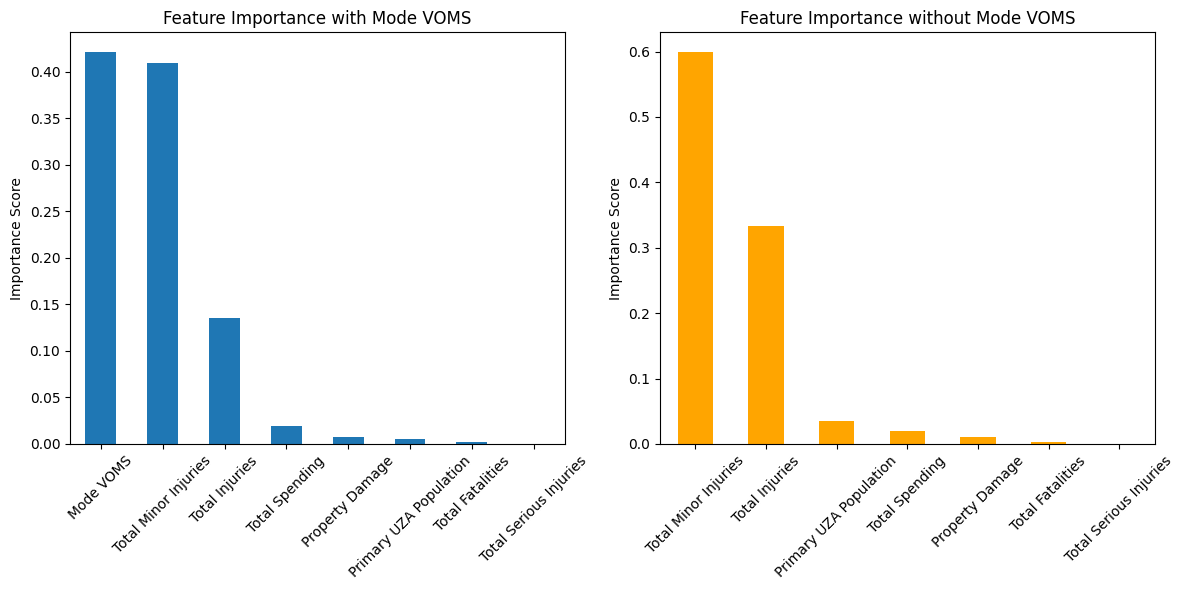

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
feature_importance.plot(kind='bar')
plt.title('Feature Importance with Mode VOMS')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
feature_importance_no_voms.plot(kind='bar', color='orange')
plt.title('Feature Importance without Mode VOMS')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. Mode VOMS is Critical:
   The operational capacity (Mode VOMS) is the strongest predictor of UPT, reaffirming its direct link to ridership. Transit agencies should prioritize accurate data on service operations.

2. Safety Metrics Are Secondary Predictors:
   In the absence of Mode VOMS, safety-related features (Total Minor Injuries,Total Injuries) become critical. This might reflect how safer systems potentially attract more ridership.

3. Demographics and Spending Play a Minor Role:
   Features like Primary UZA Population and Total Spending contribute marginally. While important, they are likely overshadowed by operational and safety metrics in the short term.

1. Focus on Operational Metrics:
   Transit agencies should ensure accurate data collection on metrics like VOMS and optimize vehicle utilization for increased ridership.

2. Improve Safety Measures:
   Reducing injuries and incidents could indirectly support ridership growth.

3. Reassess Spending Impacts:
   The low importance of Total Spending suggests a need to evaluate how financial investments translate into tangible ridership benefits.

